In [1]:
import sys,os
sys.path.append(os.path.abspath('../src/')) # para importar nbpil
try:
    sys.imagepath.append(os.path.abspath('../data/')) # caminho para imagens
except:
    sys.imagepath = [os.path.abspath('../data/')]
sys.imagepath.append(os.path.abspath('../../../datasets/ia898/'))
import numpy as np

import nbpil

In [2]:
from cStringIO import StringIO
from IPython.display import display, Image, HTML
import base64
import numpy as np
import PIL # from PIL import Image
def nbshow_grid(flist, title_list=None, fmt='png'):
    imagesList = "<head><style>\
        table, th, td { border: 0px solid black;\
        text-align: center;border-collapse: collapse;}</style></head>\
        <body><table border=\"0\"><tr>"
    for a,title in zip(flist,title_list):
        if a.dtype == bool:
            a = np.uint8(a) * 255
        elif a.dtype != np.uint8:
            raise ValueError('Accept only bool ou uint8 image. It was %s' % a.dtype) 
        f = StringIO()
        fi = PIL.Image.fromarray(a)
        fi.save(f, fmt)
        imgbuffer = f.getvalue()
        img_b64 = base64.b64encode(imgbuffer)
        imagesList +="<td><table><tr><td>\
            <img src='data:image/png;base64,%s'/></td></tr>\
            <tr><td align='center'>%s</td></tr></table></td>" % (img_b64,title)
    imagesList +="</tr></table></body>"
    #print 'imagelist:',imagesList
    display(HTML(imagesList))



""
a1
""
a2

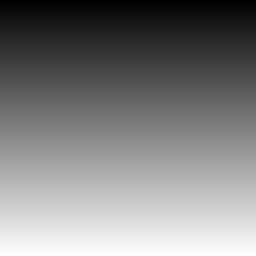
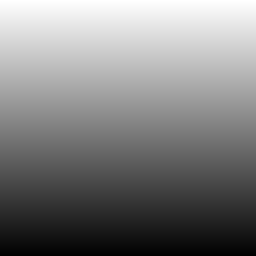

In [3]:
f1 = nbpil.nbread('cameraman.tif')
f2 = nbpil.nbread('boat.tif')
a1 = (np.arange(256).reshape((256,1)) * np.ones((1,256))).astype(np.uint8)
a2 = a1[::-1,:]
#nbpil.nbshow(a2)
nbshow_grid([a1,a2],['a1','a2'])

In [4]:
display(HTML("<head>\
<style>\
table, th, td {\
    border: 10px solid black;\
}\
</style>\
</head>\
<body><table border=\"0\"><tr><td>1</td><td>2</td></tr></table></body>"))

1,2


In [5]:
from cStringIO import StringIO
from IPython.display import display, Image, HTML
import base64
import numpy as np
import PIL

class nbShow:
    #constructor
    def __init__(self, ncols = 3,width = [], fmt = 'png'):
        self.imgs = []
        self.titles = []
        self.ncols = ncols
        self.width = []   
        self.fmt = fmt
        return
    #sets figure size. Ex figsize = (12,8)
    def set_figsize(self,figsize):
        self.figsize = figsize
        return
    #sets image width
    def set_width(self,width):
        self.width = width
        return    
    #displays image in subplot format 
    #append images to list of images to be displayed
    def nbshow(self,img=None,title = ""):
        if img is not None:
            self.imgs.append(img)
            self.titles.append(title)
        else: 
            number_of_subplots = len(self.imgs)
            imagesList = "<head><style>\
                table, th, td { border: 0px solid black;\
                text-align: center;border-collapse: collapse;}</style></head>\
                <body><table border=\"0\">"
            for i,(img,title) in enumerate(zip(self.imgs,self.titles)): 
                if i%self.ncols == 0:
                    imagesList += "<tr>"
                if img.dtype == bool:
                    img = np.uint8(img) * 255
                elif img.dtype != np.uint8:
                    raise ValueError('Accept only bool ou uint8 image. It was %s' % img.dtype) 
                f = StringIO()
                fi = PIL.Image.fromarray(img)
                fi.save(f, self.fmt)
                imgbuffer = f.getvalue()
                img_b64 = base64.b64encode(imgbuffer)
                imagesList +="<td>\
                    <table><tr><td><img src='data:image/png;base64,%s'/></td></tr>\
                    <tr><td align='center'>%s</td></tr></table></td>" % (img_b64,title)
                if i%self.ncols == (self.ncols-1):
                    imagesList += "<tr>"
            imagesList +="</tr></table></body>"
            # empties buffer
            self.imgs = []
            self.titles = []
            #print 'imagelist:',imagesList
            display(HTML(imagesList))


""
a1
""
a2

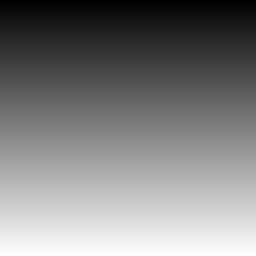
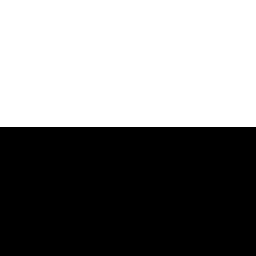

""
f1
""
a1a2
""
f2

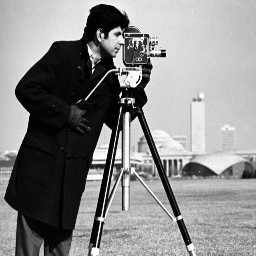
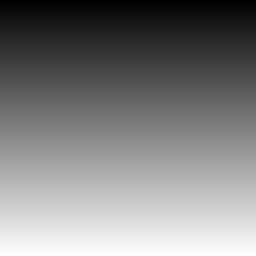
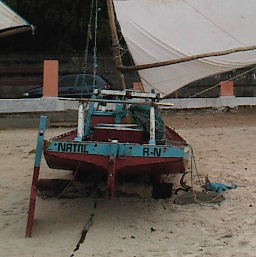

In [6]:
nb = nbShow(ncols=3,width=100)
nb.nbshow(a1,'a1')
nb.nbshow(a2>128,'a2')
nb.nbshow()
nb.nbshow(f1,'f1')
nb.nbshow(a1,'a1a2')
nb.nbshow(f2,'f2')
nb.nbshow()

""
""
""
""

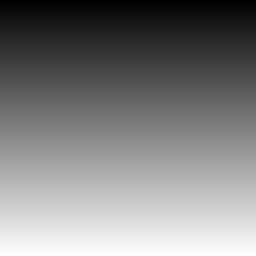
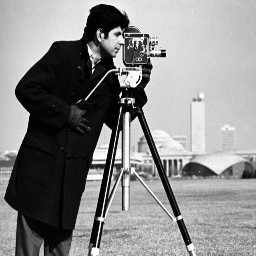

In [9]:
fc = nbpil.nbshow(ncols=4)
fc.nbshow(a1)
fc.nbshow(f1)
fc.nbshow()